# Amsterdam AirBnB Price Predictor


---

**By Aurchon Datta, Aditi Lohtia, Paloma Tonigussi and Liliana Paroski**

Note: to run the code please drag and drop the attached airbnb.csv into the files directory.





# Data Description



---



**Introduction of dataset:**

Our dataset can be found at this link [Airbnb Dataset](https://tinyurl.com/team12Airbnb), which is located on Kaggle. We found that the dataset has 33 columns and 7,834 rows. The 33 columns is a combination of numeric variables and categorical variables that describe Airbnb lisings. For example, some of the numeric columns include the total number of beds listed, and the number of extra guests included. While some of the categorical variables include the listing's neighbourhood and property type (apartment vs house). Some or all of the columns will play a factor in how high a lisitng should be priced at. Using this dataset we are going to explore columns are the best predictor columns and we will do this through visualizing the dataset, using feature selection methods and describing our dataset. 

**Import the necessary packages:**

In [93]:
## all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge

**Read Data and Summary statistics:**

In [94]:
data = pd.read_csv("airbnb.csv")
data.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [4]:
# describe each column of data by conducting descriptive statistics 
data.describe()

,host_id,host_since_year,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,minimum_nights,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,7.833000e+03,7833.000000,7.833000e+03,7833.000000,7833.000000,7833.000000,7764.000000,7819.000000,7820.000000,7833.000000,...,7833.000000,7101.000000,7833.000000,6135.000000,6124.000000,6124.000000,6125.000000,6122.000000,6124.000000,6122.000000
mean,9.879849e+06,2012.929784,2.926936e+06,52.366533,4.888232,3.114643,1.112957,1.414887,1.983887,129.010979,...,2.509000,0.908396,13.832887,93.342298,9.446930,9.289517,9.638857,9.698301,9.292946,9.040346
std,7.932933e+06,1.174583,1.739974e+06,0.014116,0.030059,1.757483,0.394872,0.886217,1.654441,128.032413,...,1.898255,0.151901,25.476797,7.535279,0.815671,0.967856,0.726375,0.645667,0.849480,0.881756
min,1.662000e+03,2008.000000,2.818000e+03,52.291569,4.763264,1.000000,0.000000,0.000000,1.000000,15.000000,...,1.000000,0.020000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.430410e+06,2012.000000,1.309364e+06,52.356731,4.869670,2.000000,1.000000,1.000000,1.000000,85.000000,...,1.000000,0.880000,1.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000
50%,7.392601e+06,2013.000000,2.964891e+06,52.366538,4.886406,2.000000,1.000000,1.000000,1.000000,109.000000,...,2.000000,1.000000,5.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000
75%,1.505417e+07,2014.000000,4.473450e+06,52.375805,4.903265,4.000000,1.000000,2.000000,2.000000,150.000000,...,3.000000,1.000000,15.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3.059504e+07,2015.000000,5.897527e+06,52.425381,5.019667,16.000000,8.000000,10.000000,16.000000,9000.000000,...,27.000000,1.000000,297.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Data Visualizations:**

Numeric columns



<Axes: xlabel='bedrooms', ylabel='price'>

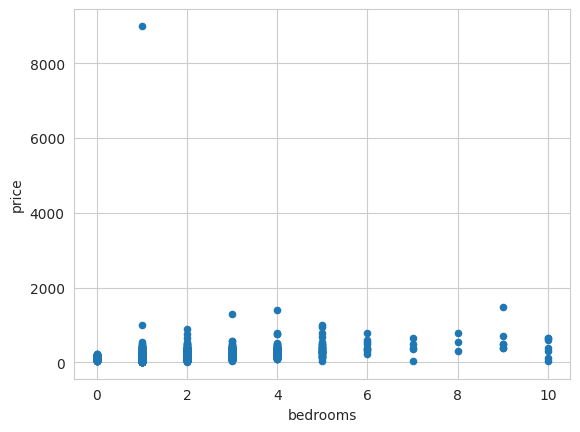

In [7]:
#Plotting the # of bedrooms to the price to see how number of beds affects price
data.plot.scatter(x="bedrooms", y="price")

<Axes: xlabel='beds', ylabel='price'>

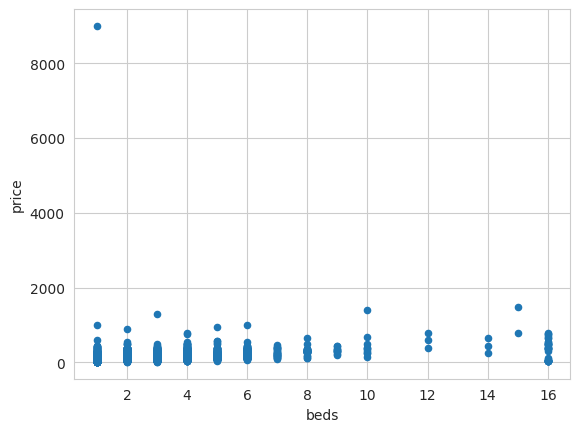

In [8]:
#Plotting the number of beds to the price to see how number of beds affects price
data.plot.scatter(x="beds", y="price")

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

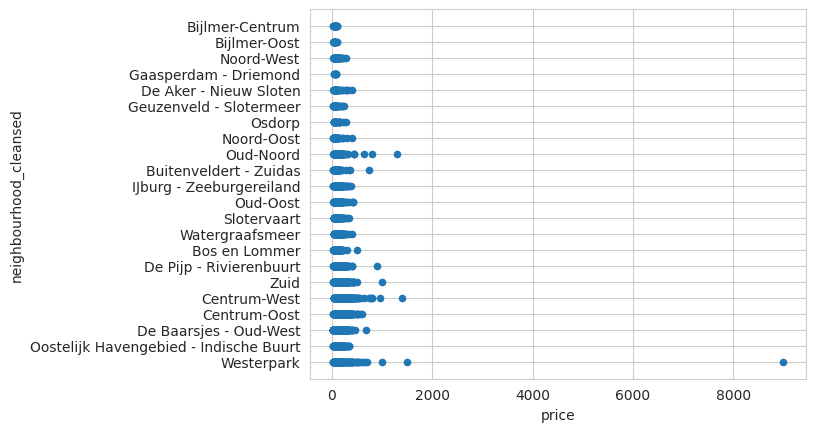

In [9]:
#Seeing what effect the neighborhood has on the price
data.plot.scatter(x="price", y="neighbourhood_cleansed")

<Axes: xlabel='number_of_reviews', ylabel='price'>

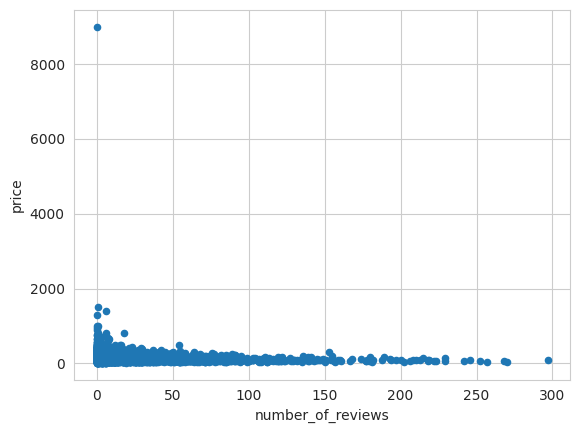

In [10]:
#Seeing what effect the number of reviews on a listing has on the price
data.plot.scatter(x="number_of_reviews", y="price")

<Axes: xlabel='review_scores_value', ylabel='price'>

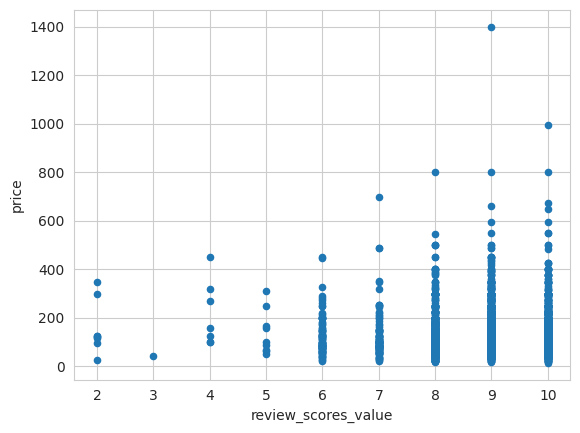

In [11]:
#Plotting the review score values of a listing to the price to see what effect it has
data.plot.scatter(x="review_scores_value", y="price")

<Axes: xlabel='price', ylabel='property_type'>

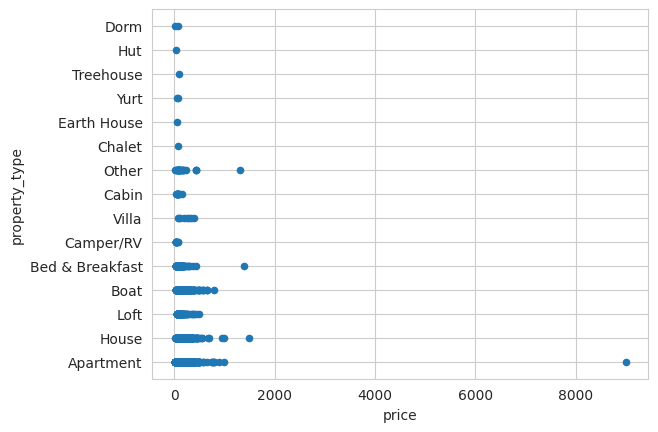

In [12]:
#Seeing what effect the property type has on the price
data.plot.scatter(x="price", y="property_type")

<Axes: xlabel='room_type', ylabel='price'>

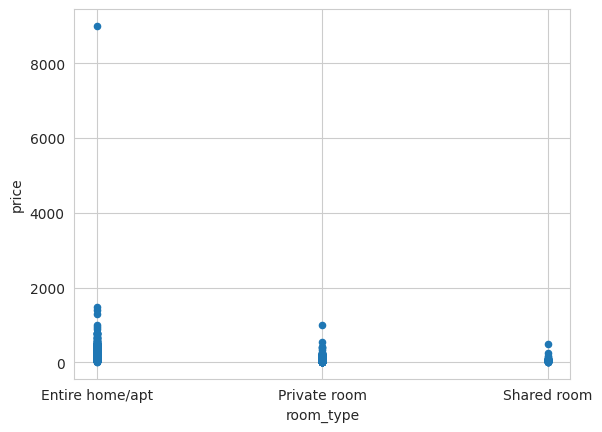

In [13]:
#Seeing what effect the type of room has on the price
data.plot.scatter(x="room_type", y="price")

Categorical Columns:



<Axes: >

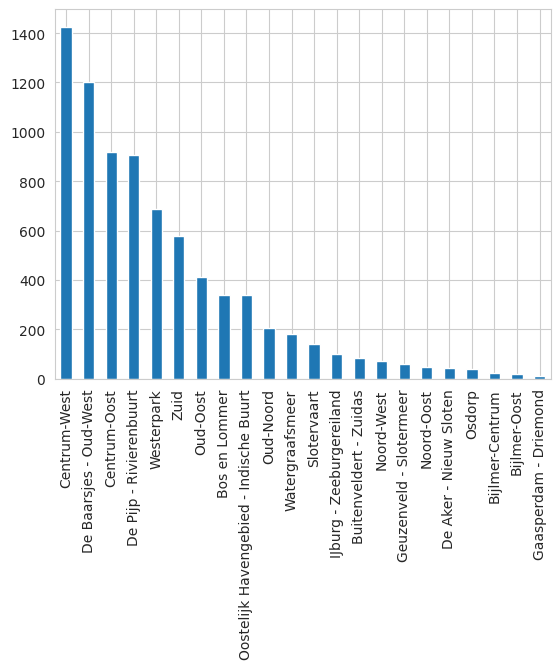

In [14]:
# Show count of different values for neighbourhood cleansed
data['neighbourhood_cleansed'].value_counts().plot(kind='bar')

<Axes: >

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22982 (\N{CJK UNIFIED IDEOGRAPH-59C6}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20025 (\N{CJK UNIFIED IDEOGRAPH-4E39}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963

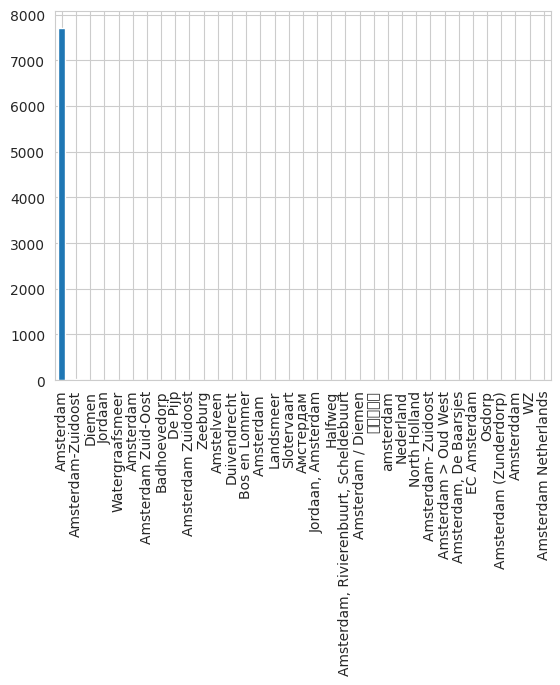

In [15]:
# Show count of different values for city
data['city'].value_counts().plot(kind='bar')

<Axes: >

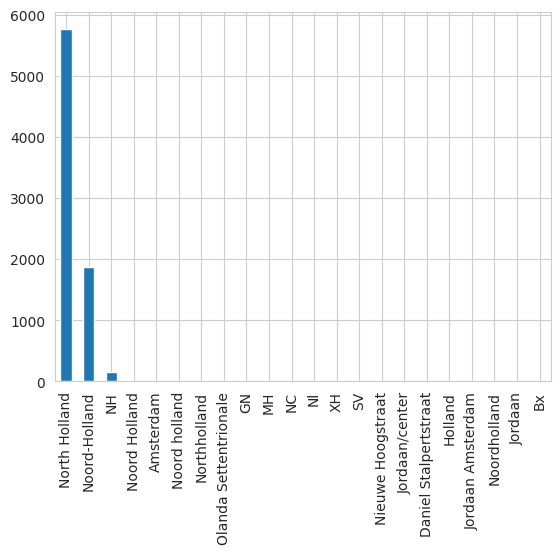

In [16]:
# Show count of different values for state
data['state'].value_counts().plot(kind='bar')

<Axes: >

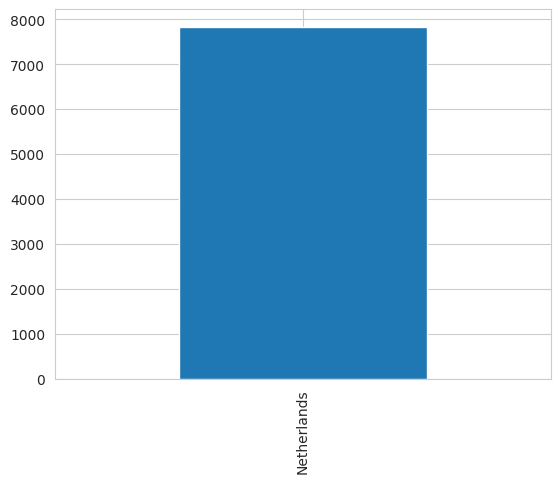

In [17]:
# Show count of different values for country
data['country'].value_counts().plot(kind='bar')

<Axes: >

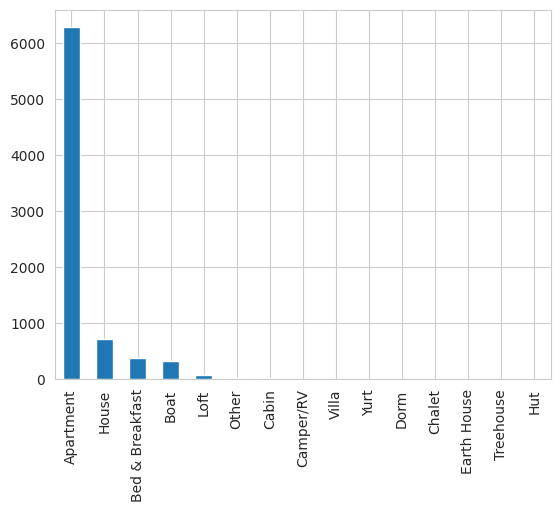

In [18]:
# Show count of different values for property type
data['property_type'].value_counts().plot(kind='bar')

<Axes: >

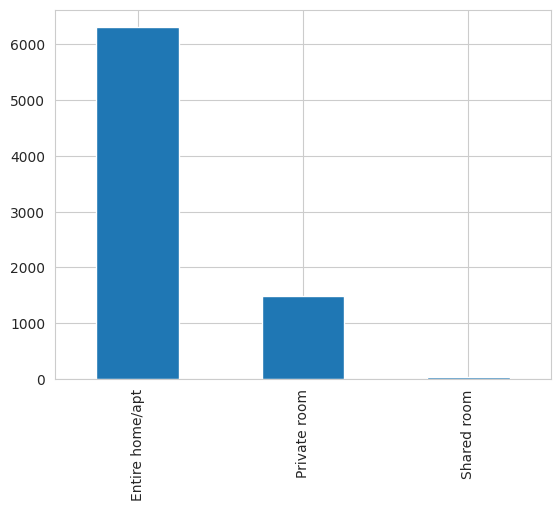

In [19]:
# Show count of different values for room type
data['room_type'].value_counts().plot(kind='bar')

<Axes: >

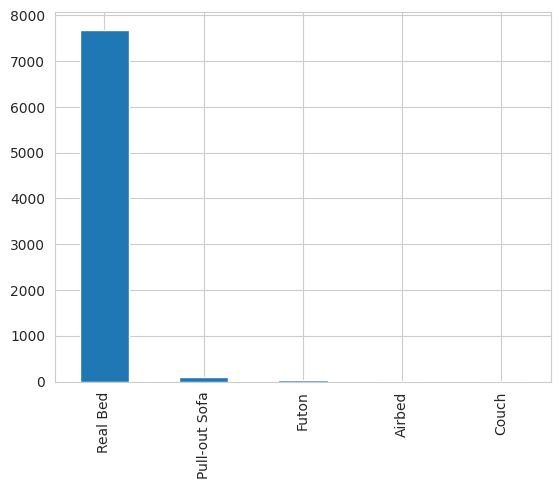

In [20]:
# Show count of different values for bed_type
data['bed_type'].value_counts().plot(kind='bar')

<Axes: >

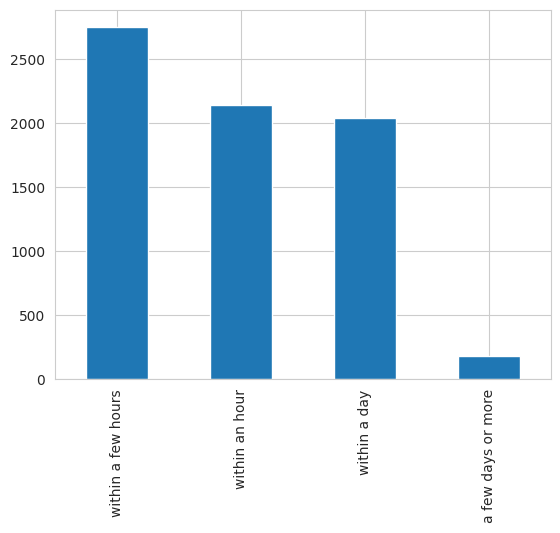

In [21]:
# Show count of different values for host response time
data['host_response_time'].value_counts().plot(kind='bar')

Other visualizations:

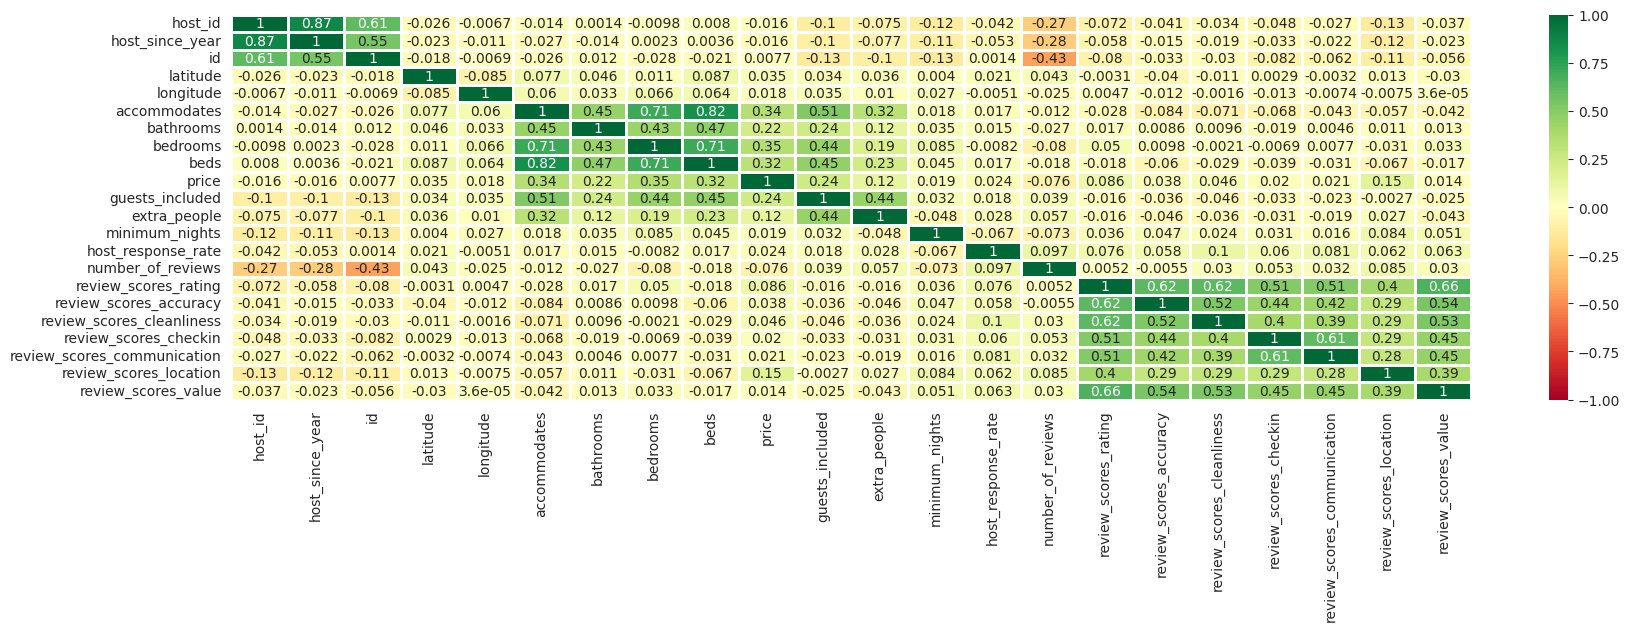

In [22]:
# Heat map to see the correlation between columns
plt.figure(figsize=(20,5))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.8,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            cmap="RdYlGn"    )

plt.show()

**Data Cleaning and Data Transformation:**

In [23]:
# calculate number of observations before data cleaning is performed
print("The number of observations is",len(data))

The number of observations is 7833


In [95]:
#check which columns have null values to see how to transform the missing values
data.isnull().sum()

host_id                           0
host_name                         0
host_since_year                   0
host_since_anniversary            0
id                                0
neighbourhood_cleansed            0
city                              0
state                             8
zipcode                         173
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy      

In [96]:
# drop all rows that have any blank values
data = data.dropna()

Why did we choose to remove all the missing data?


*   The values that are missing, such as zipcode are unique to the row and cannot be interpolated from the data around it. For example, sometimes with missing data you can take the average across the entire dataset to fill the null values but with columns like the review_scroes_rating, this isn't realistic because its so specific to the listing
*   We also couldn't fill in the zipcode since we do not have the address listed to be able to determine what the associated zipcode is



In [26]:
# calculate number of observations without blank values
print("The number of observations after dropping the missing value columns is",len(data))

The number of observations after dropping the missing value columns is 5508


In [56]:
# check if there are any rows with null values
data.isnull().sum()

host_id                        0
host_name                      0
host_since_year                0
host_since_anniversary         0
id                             0
neighbourhood_cleansed         0
city                           0
state                          0
zipcode                        0
country                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
host_response_time             0
host_response_rate             0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_sco

Certain columns from the dataset will not be used as features for the model as they have been deemed not to be generalizable, specifically:


**Host_id, host_name, id**: These are unique identifiers (pieces of information to identify users) and will not help us predict prices.


**Country, State, City**: Country and state columns always have one set value so they can be ignored. For the city column, >99% of the given data has city = ‘Amsterdam’ but <1% of the datapoints have their city column set to another city in the Netherlands. We will ignore these data points as our model is focused on Amsterdam and also there is a comparable lack of data regarding these other cities. Therefore, since we are only using datapoints where city = ‘Amsterdam’, we can ignore this column for our model.


In [97]:
# remove non-generalizable columns
data = data.drop(['host_id', 'id','country','state'], axis=1)

In [98]:
# transform date columns and convert to integer
data['date_started'] = pd.to_datetime(data['host_since_anniversary']+ "/"+ data['host_since_year'].astype(str).str[2:])
print(data)

# drop original date columns
data = data.drop(columns=['host_since_anniversary'])
data = data.drop(columns=['host_since_year'])

# change this column to an int so we can use it as a numerical column
data['date_started'] = data['date_started'].astype('int64')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Feature Engineering:**

Get all categorical and numerical columns

In [99]:
# first get the datatypes of all columns
data.dtypes

host_name                       object
neighbourhood_cleansed          object
city                            object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
guests_included                  int64
extra_people                     int64
minimum_nights                   int64
host_response_time              object
host_response_rate             float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

In [100]:
# get the numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_cols)

['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'date_started']


In [101]:
# get the categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['host_name', 'neighbourhood_cleansed', 'city', 'zipcode', 'property_type', 'room_type', 'bed_type', 'host_response_time']


Take out any outliers from the numerical columns:

In [102]:
# choose a lower and upper percentile
lower_percentile = 1
upper_percentile = 99

# get the numerical data
numerical_data = data[numerical_cols]

# get the datapoints in the the lower and upper percentile
lower_points = numerical_data.quantile(lower_percentile / 100)
upper_points = numerical_data.quantile(upper_percentile / 100)

print(len(data))

# check if the values are between the lower and upper points by using the lambda function on each column
mask = numerical_data.apply(lambda x: x.between(lower_points[x.name], upper_points[x.name]), axis=0)

# check if all values in each row are true (in between the lower and upper points)
mask = mask.all(axis=1)

# set the data mask, except the r squared value is low so we do not set it back to the dataframe
df_no_outliers = data[mask]

print(len(df_no_outliers))


5508
4764


We attempted to remove outliers from the dataset in order to avoid overfitting and to try and ensure more accurate predictions. This was done without much success as once we removed the outliers our accuracy declined, and so we have decided not to remove the outliers.

**One-hot encoding of the categorical features**

In [103]:
# concatenate each categorical column with its corresponding value
for col in categorical_cols:
    data[col] = data[col].apply(lambda x: col + '_' + str(x))

# one-hot encode the concatenated categorical columns
one_hot_cat_df = pd.get_dummies(data[categorical_cols], prefix='', prefix_sep='')

# concatenate the new one hot encoded categorical features into the original dataframe
data = pd.concat([data, one_hot_cat_df], axis=1)

# drop the original categorical columns from the dataframe
data.drop(categorical_cols, axis=1, inplace=True)

Display the correlations between all features and the price label

In [104]:
# set the max amount of columns and rows to none so that they can all be displayed later on
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# find the correlations of all features with the price label
correlations = data.corrwith(data['price'])

# convert the correlation coefficients to a dataframe, in order to be sorted
corr_df = pd.DataFrame({'feature': correlations.index, 'corr': correlations.values})

# sort the correlations dataframe
corr_df_sorted = corr_df.sort_values(by='corr', ascending=False)

# display the sorted correlations
print(corr_df_sorted.to_markdown())

|      | feature                                                       |         corr |
|-----:|:--------------------------------------------------------------|-------------:|
|    6 | price                                                         |  1           |
|    4 | bedrooms                                                      |  0.596665    |
|    2 | accommodates                                                  |  0.596511    |
|    5 | beds                                                          |  0.542776    |
|    7 | guests_included                                               |  0.451645    |
|    3 | bathrooms                                                     |  0.378501    |
| 4929 | room_type_Entire home/apt                                     |  0.34271     |
| 2414 | neighbourhood_cleansed_Centrum-West                           |  0.206905    |
|    8 | extra_people                                                  |  0.189987    |
| 2759 | zipcode_1015 AD        

From the data above, we can see that price is moderatly correlated (between 0.5 and 0.7) with the following features: 

* bedrooms
* accomodates
* beds


We can also see that price has a low correlation (between 0.3 and 0.5) between these features:

* guests_included
* bathrooms
* room_type_Entire home/apt

The rest of the features have below 0.3 correlation so they have little to no correlation to the price. From this analysis, we will include the 6 features above in our model and check the accuracy from their predictions



# Machine Learning


---


* Present your results of solving a problem using different ML algorithms/ performance
improvement by doing parameter tuning and evaluating on several datasets
* Clearly interpret and discuss your results: showcase accuracy, insights (and running time, if applicable)
* Point out any surprising or unexpected results

* Split the data
* Choose the model
* Train the model
* Evaluate the model
* Test the model

**Linear Regression Model**

Helper Functions:

In [105]:
# set the selected features to be for these features combined
def select_features(dataframe, num_features, cat_features):
    all_selected_features = num_features + cat_features

    # Create a new dataframe with only the selected features
    df_selected = dataframe[all_selected_features]

    # set the target
    Y_target = dataframe['price']

    return df_selected, Y_target, all_selected_features

In [106]:
# create numerical and categorical transformers for scaling and one hot encoding
def preprocess_features(X_features, cat_features, num_features):
    num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    cat_transformer = OneHotEncoder(handle_unknown='ignore')

    # put the transformers into the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('numerical', num_transformer, num_features),
            ('categorical', cat_transformer, cat_features)
        ])

    # preprocess the input features
    X_preprocessed = preprocessor.fit_transform(X_features)

    return X_preprocessed, preprocessor

In [107]:
# train the model based on what type of capability it will have
# regressionType is either linearRegression, lasso or ridge
def train_model(X_train, Y_train, preprocessor, regressionType, _alpha):

    # linear regression model
    if regressionType == "linearRegression":
        model = LinearRegression()

    # lasso regression model with preprocessor
    elif regressionType == "lasso":
        model = Lasso(alpha=_alpha, max_iter=1000)

    # ridge regression model with preprocessor
    else:
        model = Ridge(alpha=_alpha)

    # preprocessor and one of the models above are combined in the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # training data with pipeline
    pipeline.fit(X_train, Y_train)

    return pipeline


In [109]:
# evaluate the model we created
def evaluate_model(pipeline, X_test, Y_test):
    # make predictions on test data
    Y_pred = pipeline.predict(X_test)

    # evaluate model performance using R-squared
    r2 = r2_score(Y_test, Y_pred)

    # calculate root mean squared error
    MSE = mean_squared_error(Y_test, Y_pred)
    RMSE = np.sqrt(MSE)

    return r2, RMSE

In [110]:
# run the regression model, calls the helper functions above

def run_regression_model(dataframe, num_features, cat_features, alpha, regressionType):

    # select the features
    X_features, Y_target, all_selected_features = select_features(dataframe, num_features, cat_features)

    # split up data into test and training data
    X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target, test_size=0.3, random_state=0)

    # preprocess the features
    X_preprocessed, preprocessor = preprocess_features(X_features, cat_features, num_features)

    # put everything into the pipeline
    pipeline = train_model(X_train, Y_train, preprocessor, regressionType, alpha)

    # get accuracy and error
    r2, RMSE = evaluate_model(pipeline, X_test, Y_test)


    # display extra info for lasso regression
    if (regressionType == "lasso"):

      coef = pipeline.named_steps['model'].coef_

      lasso_features = [feat for feat, coef in zip(all_selected_features, coef) if coef != 0]

      count_selected_features = len(all_selected_features)
      count_lasso_features = len(lasso_features)

      print('Lasso selected features with alpha =', alpha, ':', lasso_features)
      print('Number of total features:', count_selected_features)
      print('Number of lasso features:', count_lasso_features)
      print('R-squared:', r2)

      return RMSE, pipeline, lasso_features
    else:
      print('R-squared:', r2)

In [111]:
# split up the selected numerical and categorical features into lists based on the feature engineering done above
selected_num_features = ['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds']
selected_cat_features = ['room_type_Entire home/apt']

run_regression_model(data, selected_num_features, selected_cat_features, 0, "linearRegression")

R-squared: 0.47765006897914375


Initially, as can be seen above, we ran a linear regression model on our data using the top 6 features we chose from the feature selection step. This resulted in an R2 value of 0.478 which we wanted to improve so we tried to add 4 more categorical features with 0.1-0.2 correlation with the price listed, as below. 


In [112]:
# from the top correlated 10 features, 6 are numerical and 4 are categorical
top_10_features_num = ['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'beds', 'extra_people']
top_10_features_cat = ['room_type_Entire home/apt', 'neighbourhood_cleansed_Centrum-West',
                         'zipcode_1015 AD','property_type_Boat']

run_regression_model(data, top_10_features_num, top_10_features_cat, 0, "linearRegression")

R-squared: 0.5316039265617327


As can be seen, adding 4 more features resulted in a higher R2 value reaching 0.532. 

Our Linear Regression results seemed surprising to us as we expected the Linear Regression model to perform better than it did. After selecting the most correlated features with the price we assumed that they would be enough to produce results that would result in reliable price predictions but an R2 value of 0.533 means there is still a high degree of variance between the predicted price and the actual price.

In [113]:
# Lasso Regression

# remove price from the numerical features
list_num_features = list(numerical_cols)
list_num_features.remove('price')

list_cat_features = list(one_hot_cat_df)

all_selected_features = list_num_features + list_cat_features

# try running the lasso regression model with 4 different values of alpha
run_regression_model(data, list_num_features, list_cat_features, 0.01, "lasso")
run_regression_model(data, list_num_features, list_cat_features, 0.07, "lasso")
run_regression_model(data, list_num_features, list_cat_features, 0.09, "lasso")

# get returned values (RMSE and pipeline) from this run of the regression model as it gives the best accuracy
RMSE, pipeline, lasso_features = run_regression_model(data, list_num_features, list_cat_features, 0.08, "lasso")

Lasso selected features with alpha = 0.01 : ['latitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people', 'minimum_nights', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'date_started', 'host_name_Aafke', 'host_name_Aart', 'host_name_Abdi', 'host_name_Abed', 'host_name_Ad & Anna', 'host_name_Adam', 'host_name_Albin', 'host_name_Alco', 'host_name_Alderik', 'host_name_Alletta', 'host_name_Ally', 'host_name_Alondra', 'host_name_Aloysius', 'host_name_Amstelview Apartment Riverside', 'host_name_Amsterdam', 'host_name_An', 'host_name_Ana', 'host_name_Anais', 'host_name_Andras', 'host_name_Andrea & Rob', 'host_name_Andrea Francesco', 'host_name_Anela', 'host_name_Anett', 'host_name_Anieka', 'host_name_Anja', 'host_name_Ankie', 'host_name_Anna & Derk', 'host_name_Anna & Maarten', '

Next, we ran Lasso regression on our data to check if it improved our model even further. Lasso Regression has a built-in function that will select the best features based on an alpha value which constrains the model. We hyper-tuned the alpha value by running the model with 4 different alpha increasing values and found that 0.08 produced the best results with our R2 value reaching 0.5646. 

With Lasso Regression performing slightly better than Linear Regression, this could be for several reasons. First, compared to Linear Regression where the model only took into account 10 features, Lasso used 71 features to run which we expected to lead to a better R2 value, which it did. Moreover, Lasso Regression also performs better when there are not extremely high correlations between features as it may drop some of those in the model's process, which could be another reason why it performed slightly better as our dataset does not possess high correlations between features and price.


In [114]:
# Ridge Regression
best_alpha = 0.08

run_regression_model(data, list_num_features, list_cat_features, best_alpha, "ridge")

R-squared: 0.39481884425848146


Finally, we ran Ridge Regression on our data to examine the difference we would find in the results from Lasso Regression since the two are somewhat similar. We ran the model with the same alpha values as we did in Lasso Regression, and for the optimal alpha value of 0.09 gave us an R2 value of 0.39, which is significantly worse than the other two methods. 

These results were not too surprising to us as Ridge Regression performs best when there is a high correlation between features, and in our case, we did not have a very high correlation between any feature and price. The highest was 0.596 which was the correlation between price and number of bedrooms, with most other features having a correlation under <0.3.


In [115]:
# Get the RMSE from this dataset (from the earlier best case Lasso regression with alpha=0.4)
print("RMSE:", RMSE)

average_price = data['price'].mean()

print("Average Price:", average_price)

# convert lasso_features into dataframe
lasso_df = data[lasso_features]

# make lasso_corr to be used later
lasso_corr = lasso_df.corr()

# print out lasso cross correlation
lasso_df.corr()

RMSE: 51.275652063872215
Average Price: 124.34295570079884


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,date_started,host_name_Evita,host_name_Evy,host_name_Fedorovici,host_name_Feikje,host_name_Hinke,host_name_Jaan,host_name_Jaap,host_name_Katerina,host_name_Katharina,host_name_Mauro,host_name_Max,host_name_Niek,host_name_Niek & Myrthe,host_name_Roxanne,host_name_Roy,zipcode_1016 VW,zipcode_1016 XA,zipcode_1017 NZ,zipcode_1017 PD,zipcode_1019BT,zipcode_1019JR,zipcode_1033 NL,zipcode_1052CS,zipcode_1052JK,zipcode_1054 TL,zipcode_1054 TZ,zipcode_1073 CJ,zipcode_1073 CK,zipcode_1073 CW,zipcode_1073 EA,zipcode_1073 EB,zipcode_1073 EG,zipcode_1073 EL,zipcode_1073 EN,zipcode_1073 EV,zipcode_1073 GJ,zipcode_1073 HS,zipcode_1073 JE,zipcode_1073 RR,zipcode_1073 RZ,zipcode_1073 VS,zipcode_1073 XS,zipcode_1073 XW,zipcode_1073BD,zipcode_1074 XS,zipcode_1074 XZ,zipcode_1078 dg,zipcode_1092 VA,zipcode_1092 VV,zipcode_1092 VW,zipcode_1092CM,zipcode_1093 EZ,zipcode_1093 GB
latitude,1.000000,-0.105174,0.084737,0.050740,0.023728,0.089569,0.033555,0.028328,0.018848,0.046131,-0.010283,-0.043928,-0.021020,-0.009398,-0.011356,0.008115,-0.035559,-0.026338,-0.006653,0.013963,0.008913,0.002599,-0.015540,-0.002632,-0.003585,-0.010086,0.020942,0.010768,0.007896,-0.009508,0.018395,0.020133,-0.004772,0.007446,0.003862,-0.001715,-0.002255,0.009701,0.005833,0.038836,0.006307,0.010489,-0.007752,-0.005406,-0.008143,-0.009350,-0.010818,-0.013318,-0.013662,-0.024238,-0.011163,-0.025246,-0.012206,-0.013888,-0.017949,-0.016423,-0.010252,-0.011604,-0.010043,-0.009958,-0.008638,-0.010636,-0.008952,-0.008989,-0.020420,-0.012450,-0.011330,-0.008450,-0.010125,-0.004929,-0.007697
longitude,-0.105174,1.000000,0.068318,0.040951,0.063204,0.065011,0.043481,0.015580,0.011870,-0.021803,0.011463,-0.011751,0.006216,-0.016926,0.002252,-0.022546,-0.000237,-0.016079,-0.019149,-0.000678,0.005029,-0.000499,-0.000043,-0.008608,0.008383,0.016114,0.017906,0.001681,0.011452,0.000371,-0.005192,-0.011559,-0.001242,-0.005970,-0.008947,-0.003142,-0.002665,0.013858,0.023111,0.007956,-0.005907,-0.005674,-0.013363,-0.013734,0.004669,0.004474,0.004386,0.003125,0.003771,0.009335,0.005018,0.013523,0.004641,0.005836,0.002898,0.003576,0.005436,0.005510,0.002176,0.003489,0.002333,0.002782,0.006876,0.006996,0.005284,0.024540,0.015634,0.016717,0.017608,0.018112,0.035468
accommodates,0.084737,0.068318,1.000000,0.469232,0.717554,0.843136,0.535910,0.332963,0.010345,-0.022112,-0.024856,-0.078571,-0.065044,-0.068381,-0.041372,-0.051027,-0.039252,-0.032632,-0.008678,-0.008678,-0.008678,-0.000949,0.006781,0.006781,0.026088,-0.008678,-0.008678,-0.008678,0.008253,-0.015034,-0.008678,-0.006808,0.017431,-0.008678,-0.013495,0.042387,-0.012274,0.014510,0.014510,0.006781,-0.008678,0.006781,-0.000949,-0.008678,0.006781,-0.008678,0.006781,-0.008678,-0.008678,0.011747,-0.008678,0.008252,-0.008678,-0.000949,-0.000949,-0.008678,0.006781,-0.000949,0.006781,-0.008678,-0.008678,-0.008678,-0.008678,0.006781,0.006781,0.020522,-0.000949,0.014510,0.006781,-0.016408,0.013565
bathrooms,0.050740,0.040951,0.469232,1.000000,0.424409,0.467905,0.269286,0.148500,0.050281,-0.024071,0.021069,0.015962,0.013689,-0.022902,0.005689,0.022104,0.016022,-0.021860,-0.003974,0.033312,-0.003974,-0.003974,-0.003974,-0.003974,0.013105,-0.003974,-0.003974,-0.003974,-0.004651,-0.006884,-0.003974,-0.005620,-0.007949,-0.003974,-0.007949,0.007564,-0.005620,-0.003974,-0.003974,0.033312,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,0.014669,-0.003974,-0.003974,-0.006884,-0.003974,-0.000548,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,-0.003974,0.070598,-0.003974,-0.003974,-0.003974,-0.003974,0.014669,0.020747,-0.003974,-0.003974,-0.003974,-0.003974,0.010699
bedrooms,0.023728,0.063204,0.717554,0.424409,1.000000,0.718297,0.473746,0.203549,0.081417,-0.08

In [116]:
## Identify pairs with high correlation
threshold = 0.8
high_corr_pairs = []
for i in range(len(lasso_corr.columns)):
    for j in range(i+1, len(lasso_corr.columns)):
        if abs(lasso_corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((lasso_corr.columns[i], lasso_corr.columns[j]))

print('Pairs of variables with correlation coefficient > threshold:')
for pair in high_corr_pairs:
    print(pair)

Pairs of variables with correlation coefficient > threshold:
('accommodates', 'beds')


In [120]:
# Drop highly correlated column: beds
data = data.drop(columns=['beds'])
list_num_features.remove('beds')

# run again without the beds feature
RMSE_new, pipeline_new, lasso_features_new = run_regression_model(data, list_num_features, list_cat_features, best_alpha, "lasso")

print("Removed pair RMSE:", RMSE)

Lasso selected features with alpha = 0.08 : ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'date_started', 'host_name_Evita', 'host_name_Evy', 'host_name_Fedorovici', 'host_name_Feikje', 'host_name_Hinke', 'host_name_Hjalte', 'host_name_Jaan', 'host_name_Jaap', 'host_name_Katerina', 'host_name_Mauro', 'host_name_Max', 'host_name_Niek', 'host_name_Niek & Myrthe', 'host_name_Roxanne', 'host_name_Roy', 'zipcode_1016 VW', 'zipcode_1016 XA', 'zipcode_1017 NZ', 'zipcode_1017 PD', 'zipcode_1019BT', 'zipcode_1019JR', 'zipcode_1033 NL', 'zipcode_1052CS', 'zipcode_1052JK', 'zipcode_1054 TL', 'zipcode_1054 TZ', 'zipcode_1073 CJ', 'zipcode_1073 CK', 'zipcode_1073 CW', 'zipcode_1073 EA', 'zipcode_1073 EB', 'zipcode_1073 EG', 

In hopes of improving our results further, we ran cross-correlation across all the features that were used in the Lasso Regression Model with the best alpha. We found that there were 1 set of features that was highly correlated with each other removed the feature from the data frame and reran the Lasso Regression Model. After rerunning Lasso Regression on the features we got a lower RMSE value and R2 resulting in $51.27 and 0.564 respectively.

These results were surprising as we expected to get improved results since including highly cross-correlated features could result in overfitting. Going forward, the best results continue to use Lasso Regression with an alpha of 0.04.


**Surprising or unexpected results:**


After running the data on three different models the most surprising result was the difference between the R2 value from Linear Regression compared to Lasso Regression. The linear regression model used 10 features to predict the price while the Lasson Regression model used 311 features to predict the price. With this large jump in features, you would think the R2 value would increase significantly but it only increased by 0.0246. 


# Conclusions


---

**1. Summarize and discuss your findings**

We decided to try 3 different models on our data to test which one would yield the best performance. When looking at the 3 different techniques used with the optimal alpha value of 0.08, Lasso Regression yielded the highest R2 value of 0.5591, with Linear Regression slightly less at 0.533, and Ridge Regression at 0.388. Based on these findings we would decide to move forward with using the Lasso Regression model for the rest of our findings. 


We also computed the root mean squared error (RMSE) on our model to see the average error between the predicted values and actual values and obtained a value of 53.39. To put this into context, the average price of a listing in our dataset is 124.32 dollards, and the average error is therefore 53.39 dollars. Considering an RMSE of 30% less than the average price is considered good, in our case that ends up being 37 dollars which is still less than the value of 53.39 dollars that we obtained however, it is not too far off.


We then performed cross-correlation on our model to determine what features were too closely correlated in order to be able to drop them from the model in order to avoid overfitting. It was found that there were 2 sets of highly correlated variables: beds and accommodates being the first pair, and host-name and zipcode being the second pair. We then decided to drop beds and zipcodes from the dataset in order to reduce the chance of overfitting. This resulted in an RMSE value of $56.76 and an R2 value of 0.5. These results are worse than just using Lasso Regression, which was unexpected as we were anticipating the results to be improved.  


We have identified certain limitations which could explain why our accuracy is sub-optimal. To begin, in our dataset our features do not have high correlations to price, which is problematic as regression models work best when there is a moderate to high correlation between features, which our dataset does not provide. This could indicate in general that our dataset was not the best suited for our machine learning problem due to the low correlation and data only from one city, which is something we discovered as we ran our models and realized that our dataset was not as good as we initially thought it was. Another limitation which potentially led to obtaining a lower accuracy would be the fact that prices can be biased as there are other factors that haven’t been taken into consideration that can affect the price of a listing, such as how modern a home is. An example of this could be 2 properties which have the same features such as the number of bedrooms and neighbourhoods may have very different nightly rates based on the fact one is renovated very modernly, and one is very outdated and old. This would not be taken into account in our model but can play a very important factor on the price. 


**2. What does this mean in the real world? Use non-technical words to communicate the implications of your results to readers**

If our model produces accurate results we would expect that this would enhance guests' experience as they can see if they are being charged a reasonable amount. But since our models’ results are not as good as we had hoped we believe that there is a potential for negative implications for the guests when using our predictor. For example, our price predictor might overprice a listing, which would make the guest think they are getting a deal but in reality, this might not be true. On the flip side, our price predictor might underprice a listing which could discourage a guest from booking a reasonably priced listing.


From the lister's perspective, whether our model performs accurately or not, their listing might be overpriced compared to our price prediction which could lead to guests booking less with them, thus resulting in a lower revenue per year. Since our model isn’t as accurate as it should be, some listings might unfairly be categorized as overpriced when they are reasonable, which is a huge implication if guests start going elsewhere. 
Our model should be improved so that it has 90% accuracy results before it is used publicly to prevent the negative implications that could occur if we overprice or underprice a listing. The next steps are explored in part 4 of the conclusion to show how we could achieve a better accuracy. 



**3. What were the most important or most surprising things you learned about machine learning while working on your project.**

One important aspect of machine learning that we all learned while working on our project this term was that the data that goes into the model will play a huge factor in the results that come out of the model. For example, as mentioned before we removed outliers from our dataset but we found that doing that produced worse accuracy results compared to leaving the outliers in. We further learned that the data going into the model is very important when we realized we had to convert the data types to fit to our model. For example, the linear regression model doesn’t support categorical features so we spent a long time determining how to one hot encode all of the categorical features.


Another critical aspect of machine learning is choosing the correct model to implement and making sure we understand that machine learning isn’t a ‘one-size fits all’ solution. We used Linear Regression, Lasso Regression and Ridge Regression and each model produced different results. This helped us understand that determining the best model can vastly change your results which can be seen through the results from Ridge Regression compared to the other two. 


Lastly, we found that feature selection is a very important aspect of machine learning because choosing the features will affect the performance of the model. Using the Linear Regression model we had to come up with the best features which were done by choosing the most correlated features. After running it with 6 features we found that the results weren’t acceptable so we added 4 more features which resulted in better results thus showing us that feature selection can greatly effect the results.


**4. Next steps suggestions/ scope for readers to continue on this project**

A next step for readers who wish to continue this project would be to explore more Airbnb datasets that could be used for this problem. The dataset we worked with was only pertaining to listings in Amsterdam, but to expand the scope of the project it would be beneficial to add data from different cities. This may also be useful to provide more diversity in the data, by adding listings from various cities you would be able to see how pricing trends vary and the model would become more generalized which could contribute to a higher accuracy overall. 


Moving forward, another next step could be to explore the difference in results between sites similar to Airbnb. Other sites like Vrbo or HomeAway provide the same services as Airbnb  and so it could be interesting to explore how the different sites may have different trends when it comes to pricing, and see if certain sites have better accuracies than others when their data is run through our model. Creating one model that could be generalizable to several vacation rental sites would also broaden the current scope of this project.


# Bibliography


---




1. Ajitesh KumarI . (2022, April 24). Lasso regression explained with python example. Data Analytics. Retrieved April 6, 2023, from https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/

2. Arora, M. (2021, January 11). Amsterdam Airbnb Prices Dataset. Kaggle. Retrieved April 6, 2023, from https://www.kaggle.com/datasets/aroramahima1/amsterdam-airbnb-prices-dataset?fbclid=IwAR3nvgyjafMIO7Vl-bgbBfyMmc51N9X9Wq6dTK-x-0EgCg5a4zuGtFmrLfU 

3. Karim DjedidiKarim Djedidi 1. (1AD). How to calculate correlation between all columns and remove highly correlated ones using pandas? Stack Overflow. Retrieved April 6, 2023, from https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

13. Numpy.sqrt#. NumPy. (n.d.). Retrieved April 6, 2023, from https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html 

2.   Pandas.get_dummies#. pandas.get_dummies - pandas 2.0.0 documentation. (n.d.). Retrieved April 6, 2023, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html 

3. Sklearn.model_selection.train_test_split. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
4. Sklearn.compose.ColumnTransformer. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html 
5. Sklearn.pipeline.pipeline. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
6. Sklearn.preprocessing.StandardScaler. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 
7. Sklearn.preprocessing.onehotencoder. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html 
8. Sklearn.linear_model.linearregression. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
9. Sklearn.metrics.r2_score. scikit. (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html 

12. sklearn.metrics.mean_squared_error. scikit . (n.d.). Retrieved April 6, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html 



